# Taylor Swift EDA

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [25]:
rankings = pd.read_excel('data/taylorswift_data.xlsx', sheet_name='rankings')
metadata = pd.read_excel('data/taylorswift_data.xlsx', sheet_name='metadata')
lyrics = pd.read_excel('data/taylorswift_data.xlsx', sheet_name='lyrics')

In [26]:
rankings.head()

,Album,Song,Rank
0,Debut,Picture To Burn,8
1,Debut,Our Song,7
2,Debut,Teardrops On My Guitar,6
3,Debut,Should've Said No,4
4,Debut,Mary's Song (Oh My My My),2


In [27]:
metadata.head()

,Album,Song Name,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature
0,Red,22,0.658,0.729,7,-6.561,1,0.0378,0.00215,0.0013,0.0752,0.668,104.007,230133,4
1,reputation,...Ready For It?,0.613,0.764,2,-6.509,1,0.1360,0.05270,0.0000,0.1970,0.417,160.015,208187,4
2,Taylor Swift,A Perfectly Good Heart,0.483,0.751,4,-5.726,1,0.0365,0.00349,0.0000,0.1280,0.268,156.092,220147,4
3,Taylor Swift,A Place in this World,0.576,0.777,9,-2.881,1,0.0324,0.05100,0.0000,0.3200,0.428,115.028,199200,4
4,Lover,Afterglow,0.756,0.449,9,-8.746,1,0.0344,0.13000,0.0000,0.1140,0.399,111.011,223293,4


In [28]:
merged_data = rankings.merge(
    metadata.drop(
        columns='Album'), 
        how="left", 
        left_on='Song', 
        right_on='Song Name').drop(columns='Song Name').merge(
            lyrics.drop(columns=['Album']), 
            how="left", 
            left_on='Song', 
            right_on='Song Name').drop(columns='Song Name')
merged_data.head()

,Album,Song,Rank,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time Signature,Lyrics
0,Debut,Picture To Burn,8,0.658,0.877,7.0,-2.098,1.0,0.0323,0.1730,0.0,0.0962,0.821,105.586,173067.0,4.0,NaN
1,Debut,Our Song,7,0.668,0.672,2.0,-4.931,1.0,0.0303,0.1110,0.0,0.3290,0.539,89.011,201107.0,4.0,I was ridin' shotgun with my hair undone In th...
2,Debut,Teardrops On My Guitar,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drew looks at me I fake a smile so he won't se...
3,Debut,Should've Said No,4,0.476,0.777,4.0,-3.771,0.0,0.0289,0.0103,0.0,0.1960,0.472,167.964,242200.0,4.0,It's strange to think the songs we used to sin...
4,Debut,Mary's Song (Oh My My My),2,0.403,0.627,2.0,-5.280,1.0,0.0292,0.0177,0.0,0.1820,0.374,74.900,213080.0,4.0,She said I was seven and you were nine I looke...


In [118]:
colors = {
    "Debut": "mediumseagreen",
    "Fearless": "gold",
    "Speak Now": "mediumpurple",
    "Red": "indianred",
    1989: "deepskyblue",
    "Reputation": "dimgrey",
    "Lover": "violet",
    "Folklore": "silver",
    "Evermore": "orange",
    "Midnights": "royalblue",
}

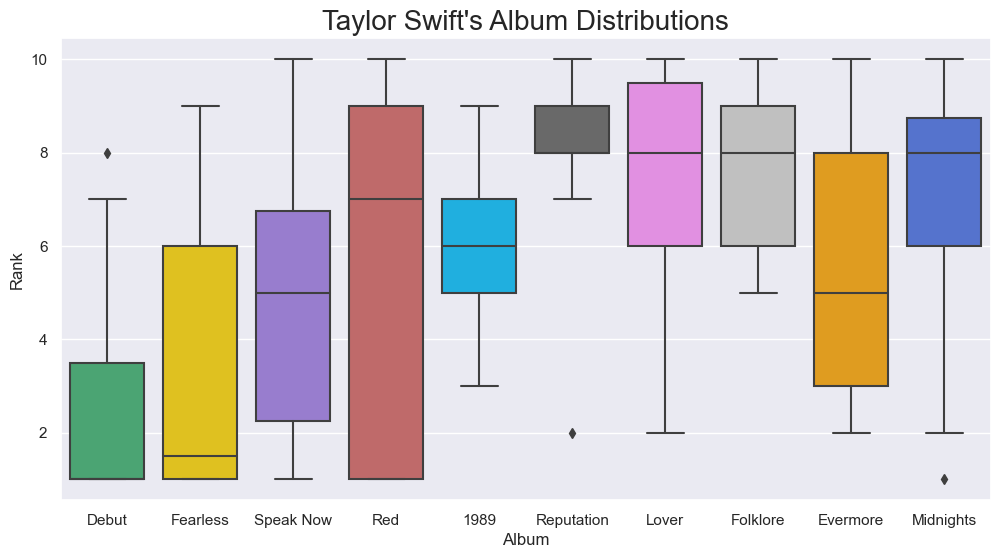

In [131]:
sns.set()

plt.figure(figsize=(12, 6))
plt.title("Taylor Swift's Album Distributions", fontsize=20)
sns.boxplot(x='Album', y='Rank', data=rankings, hue_order='Album', palette=colors)
plt.savefig('results/album_distributions.png')

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Taylor Swift's  Distributions", fontsize=20)
sns.boxplot(x='Album', y='Rank', data=rankings, hue_order='Album', palette=colors)
# plt.savefig('results/album_distributions.png')

In [134]:
rankings.plot(x='Rank', y=stacked=True, kind='bar', figsize=(12, 6), color=colors.values())

TypeError: no numeric data to plot

In [146]:
countrankings = rankings.groupby(['Album', 'Rank']).count().reset_index()
countrankings.columns = ['Album', 'Rank', 'Count']

In [154]:
countrankings.head()

,Album,Rank,Count
0,1989,3,2
1,1989,4,3
2,1989,5,3
3,1989,6,6
4,1989,7,6


AttributeError: Rectangle.set() got an unexpected keyword argument 'hue'

<Figure size 2000x600 with 0 Axes>

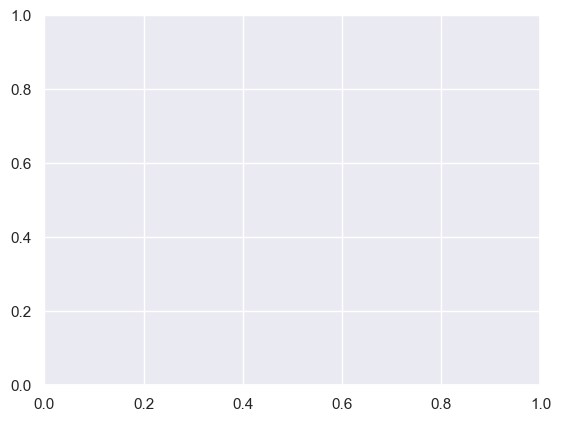

In [155]:
plt.figure(figsize=(20, 6))
